In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df = pd.read_csv('Time spent on App and earning.csv')

In [21]:
df.head()

,Time on App,Yearly Amount Spent
0,12.655651,587.951054
1,11.109461,392.204933
2,11.330278,487.547505
3,13.717514,581.852344
4,12.795189,599.406092


In [22]:
df['Time on App'][0]

12.655651150000001

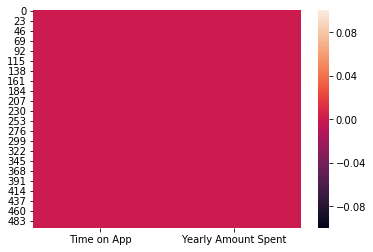

In [23]:
sns.heatmap(df.isnull())

In [24]:
df.describe()

,Time on App,Yearly Amount Spent
count,500.000000,500.000000
mean,12.052488,499.314038
std,0.994216,79.314782
min,8.508152,256.670582
25%,11.388153,445.038277
50%,11.983231,498.887875
75%,12.753850,549.313828
max,15.126994,765.518462


,Time on App,Yearly Amount Spent
Time on App,1.000000,0.499328
Yearly Amount Spent,0.499328,1.000000


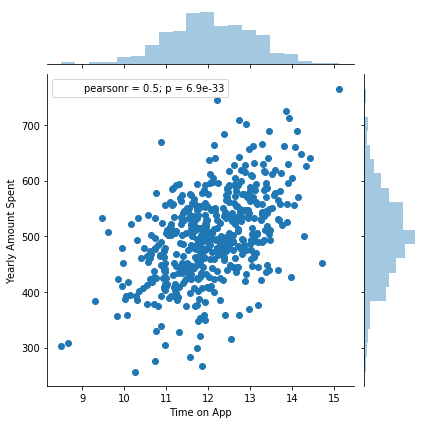

In [25]:
sns.jointplot(df['Time on App'], df['Yearly Amount Spent'])
df.corr()

In [26]:
# minimize the parameters 

def minimize_m_b1(data, m, b1, learning_rate):
    minimize_m = m
    minimize_b1 = b1
    N = float(len(data))
    for i in range(0, len(data)):
        x = data['Time on App'][i]
        y = data['Yearly Amount Spent'][i]
        minimize_m += (1/N)*( (m + b1 * x) - y)
        minimize_b1 += (1/N)*( (m + b1 * x) - y) * x
    minimized_m = m - (learning_rate * minimize_m)
    minimized_b1 = b1 - (learning_rate * minimize_b1)
    return [minimized_m, minimized_b1]
    

In [27]:

def run_minimize_m_b1(data,init_m, init_b1, learning_rate, num_iteration):
    m = init_m
    b1 = init_b1
    for i in range(num_iteration):
        m,b1 = minimize_m_b1(data, m, b1, learning_rate)
    return [m, b1]
    

In [28]:
def error_calculation(m, b1, data):
    init_error = 0
    N = float(len(data))
    for i in range(0, len(data)):
        x = data['Time on App'][i]
        y = data['Yearly Amount Spent'][i]
        init_error +=((m+ b1*x)-y)**2
    total_error = (1/(2*N) * init_error)
    return (total_error)


In [29]:
estimate_yearly_spent = []
def Run():
    data = pd.read_csv('Time spent on App and earning.csv')
    init_m = 0
    init_b1 = 0
    learning_rate = 0.0001
    num_iteration = 500
    [m, b1] = run_minimize_m_b1(data, init_m, init_b1, learning_rate, num_iteration)
    error = error_calculation(init_m, init_b1, data)
    print ("intercept: ",m, "Slope: ",b1)
    print("initial error: ",error)
    final_error = error_calculation(m, b1, data)
    print("final error: ",final_error)
    

In [30]:
if __name__ == '__main__':
    Run()

intercept:  3.3707596866 Slope:  40.8369247253
initial error:  127796.380854
final error:  2364.00581481


In [31]:
# compare the dependent values with estimate and actual number

estimate_yearly_spent = []
for i in range(0, len(df)):
    x = df['Time on App'][i]
    estimate_yearly_spent.append(3.3707596866+40.8369247253*x)

In [32]:
df['estimate_yearly_spent']=estimate_yearly_spent

In [33]:
df.head()

,Time on App,Yearly Amount Spent,estimate_yearly_spent
0,12.655651,587.951054,520.188633
1,11.109461,392.204933,457.046971
2,11.330278,487.547505,466.064472
3,13.717514,581.852344,563.551833
4,12.795189,599.406092,525.886911


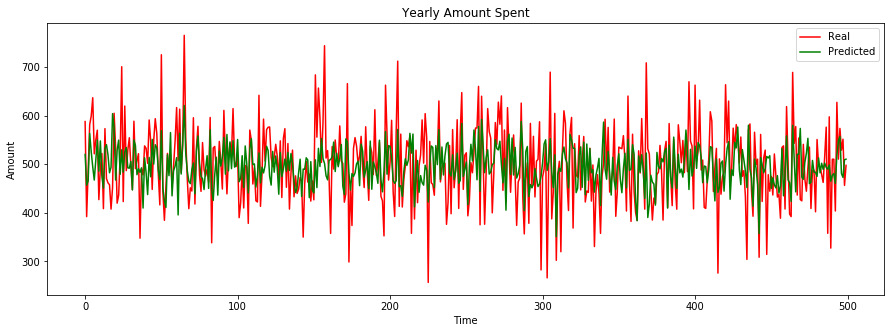

In [34]:
plt.figure(figsize=(15,5))
plt.plot(df['Yearly Amount Spent'],color='red', label='Real')
plt.plot(df['estimate_yearly_spent'],color='green',label='Predicted')
plt.title('Yearly Amount Spent')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

In [35]:
# Now lets try to use sklearn

In [36]:
X = df['Time on App']
y = df['Yearly Amount Spent']

In [37]:
X.shape

(500,)

In [38]:
X = X.values.reshape(-1,1)

In [39]:
X.shape

(500, 1)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lrm = LinearRegression()

In [44]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
pred_lrm = lrm.predict(X_test)

In [46]:
from sklearn import metrics
metrics.r2_score(y_test, pred_lrm)

0.18822882786775508

Text(0,0.5,'residual')

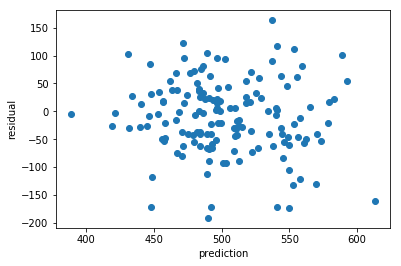

In [47]:
plt.scatter(pred_lrm,y_test-pred_lrm)
plt.xlabel('prediction')
plt.ylabel('residual')

In [48]:
lrm.coef_

array([ 41.64584878])

In [49]:
# 1 unit increase in time spent on app will result in 41 yearly spent

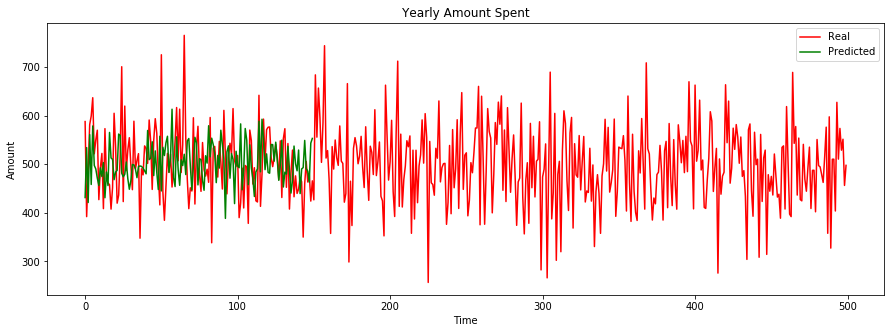

In [50]:
plt.figure(figsize=(15,5))
plt.plot(y,color='red', label='Real')
plt.plot(pred_lrm,color='green',label='Predicted')
plt.title('Yearly Amount Spent')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

In [59]:
pred_lrm[0]

431.52971135458989

In [60]:
df['estimate_yearly_spent'][0]

520.18863304880642

In [64]:
difference=0.0
total=0.0
for i in range(len(pred_lrm)):
    difference = pred_lrm[i] - df['estimate_yearly_spent'][i]
    total+=abs(difference)
    print('from GD: ',df['estimate_yearly_spent'][i], '. from LR: ',pred_lrm[i],'. difference: ',difference)

print('sum of difference: ',total)
print('ave of difference: ',total/len(pred_lrm))

from GD:  520.188633049 . from LR:  431.529711355 . difference:  -88.6589216942
from GD:  457.046971256 . from LR:  534.363146235 . difference:  77.316174979
from GD:  466.06447194 . from LR:  421.274639734 . difference:  -44.7898322055
from GD:  563.551832847 . from LR:  561.041970465 . difference:  -2.50986238162
from GD:  525.886911349 . from LR:  458.447379525 . difference:  -67.4395318244
from GD:  494.513404473 . from LR:  578.930964381 . difference:  84.4175599077
from GD:  467.537470024 . from LR:  497.665735504 . difference:  30.1282654807
from GD:  507.786778354 . from LR:  490.387597027 . difference:  -17.3991813274
from GD:  550.023442171 . from LR:  471.441235001 . difference:  -78.5822071701
from GD:  485.82342736 . from LR:  456.474116751 . difference:  -29.3493106096
from GD:  548.093496051 . from LR:  492.592992929 . difference:  -55.5005031218
from GD:  476.457671017 . from LR:  474.872031684 . difference:  -1.58563933248
from GD:  450.996477339 . from LR:  503.450143